# Plotting Query Results

## Setup

In [1]:
# Import Matplot lib
import matplotlib
from matplotlib import style
style.use('seaborn')
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np

In [3]:
# Import SQLAlchemy `automap` and other dependencies here
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect
Base = automap_base()

In [4]:
# Create an engine for the `emoji.sqlite` database
engine = create_engine("sqlite:///../Resources/emoji.sqlite", echo=False)

In [5]:
# reflect the tables
Base.prepare(engine, reflect=True)

## Explore Database

In [6]:
Base.classes.keys()

['emoji']

In [7]:
# Use the Inspector to explore the database and print the table names
inspector = inspect(engine)

In [8]:
# Use Inspector to print the column names and types
inspector.get_columns('emoji')

[{'name': 'id',
  'type': INTEGER(),
  'nullable': False,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 1},
 {'name': 'emoji_char',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'emoji_id',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'name',
  'type': TEXT(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0},
 {'name': 'score',
  'type': INTEGER(),
  'nullable': True,
  'default': None,
  'autoincrement': 'auto',
  'primary_key': 0}]

In [9]:
# Use `engine.execute` to select and display the first 10 rows from the emoji table
query = engine.execute("SELECT * FROM emoji LIMIT 10;")
for x in query:
    print(x)

(1, '😂', '1F602', 'FACE WITH TEARS OF JOY', 1814832150)
(2, '❤️', '2764', 'HEAVY BLACK HEART', 840619939)
(3, '😍', '1F60D', 'SMILING FACE WITH HEART-SHAPED EYES', 680382416)
(4, '♥️', '2665', 'BLACK HEART SUIT', 652715459)
(5, '😭', '1F62D', 'LOUDLY CRYING FACE', 515991922)
(6, '😊', '1F60A', 'SMILING FACE WITH SMILING EYES', 484540701)
(7, '♻️', '267B', 'BLACK UNIVERSAL RECYCLING SYMBOL', 452489849)
(8, '😒', '1F612', 'UNAMUSED FACE', 441690175)
(9, '💕', '1F495', 'TWO HEARTS', 381679908)
(10, '😘', '1F618', 'FACE THROWING A KISS', 377847645)


## Reflect database and Query

In [10]:
# Reflect Database into ORM class
Base = automap_base()
Base.prepare(engine, reflect=True)
Emoji = Base.classes.emoji

In [11]:
# Start a session to query the database
session = Session(engine)

Use Matplotlib to create a horizontal bar chart and plot the emoji `score` in descending order. Use `emoji_char` as the y-axis labels. Plot only the top 10 emojis ranked by score

In [12]:
# Query Emojis for `emoji_char`, `emoji_id`, and `score` and save the query into results
query2 = engine.execute("SELECT emoji_char, emoji_id, score FROM emoji ORDER BY score DESC LIMIT 10;")

Unpack tuples using list comprehensions

In [13]:
# Unpack the `emoji_id` and `scores` from results and save into separate lists
emoji_id = [x[1] for x in query2]
scores = [int(x[2]) for x in query2]

In [14]:
scores

[1814832150,
 840619939,
 680382416,
 652715459,
 515991922,
 484540701,
 452489849,
 441690175,
 381679908,
 377847645]

## Plot using Matplotlib

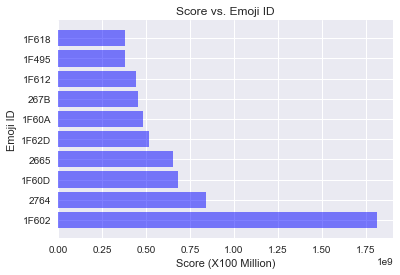

In [43]:
# Create a horizontal bar chart and plot the `emoji_id` on the y-axis and the `score` on the x-axis
# Challenge: Try to plot the scores in descending order on the graph (The largest score is at the top)

tick_locations = np.arange(len(emoji_id))
plt.barh(emoji_id, scores, align='center', color='blue', alpha=.5)
plt.title("Score vs. Emoji ID")
plt.xlabel("Score (X100 Million)")
plt.ylabel("Emoji ID")
plt.show()

## Plot using Pandas Plotting

Load the results into a Pandas DataFrame

In [29]:
# Load the results into a pandas dataframe. Set the index to the `emoji_id`
emoji_id_df = pd.DataFrame({'Emoji ID': [x for x in emoji_id], 'Scores': [y for y in scores]})
emoji_id_df = emoji_id_df.set_index(['Emoji ID'])
emoji_id_df = emoji_id_df.sort_values(['Scores'], ascending=True)
emoji_id_df

,Scores
Emoji ID,
1F618,377847645
1F495,381679908
1F612,441690175
267B,452489849
1F60A,484540701
1F62D,515991922
2665,652715459
1F60D,680382416
2764,840619939


Plot using Pandas

Text(0.5, 0, 'Score (X100 million)')

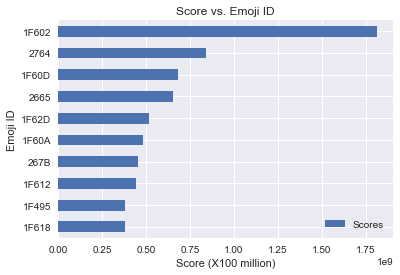

In [38]:
# Plot the dataframe as a horizontal bar chart using pandas plotting
emoji_id_df.plot.barh()
plt.title("Score vs. Emoji ID")
plt.xlabel('Score (X100 million)')

In [31]:
# BONUS: Use Pandas `read_sql_query` to load a query statement directly into the DataFrame
emoji_id_DF2 = pd.read_sql("SELECT emoji_char, emoji_id, score FROM emoji ORDER BY score DESC LIMIT 10;", engine)
emoji_id_DF2

,emoji_char,emoji_id,score
0,😂,1F602,1814832150
1,❤️,2764,840619939
2,😍,1F60D,680382416
3,♥️,2665,652715459
4,😭,1F62D,515991922
5,😊,1F60A,484540701
6,♻️,267B,452489849
7,😒,1F612,441690175
8,💕,1F495,381679908
9,😘,1F618,377847645
